<a href="https://colab.research.google.com/github/Kent-Xu/ICP1/blob/main/ClassDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [ ]:
path='/content/Data.csv'
df= pd.read_csv(path)

In [ ]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.dtypes

In [ ]:
cols= df.columns

In [ ]:
for i in cols:
  print(i)

diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
Unnamed: 32


In [ ]:

df.drop('id',axis=1,inplace=True)

In [ ]:

df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [ ]:
df.rename(columns={'concave points_mean':'concave_points_mean','concave points_se':'concave_points_se','concave points_worst':'concave_points_worst'},inplace=True)

In [ ]:

featurs_mean = list(df.columns[0:11])
featurs_all=list(df.columns[0:31])

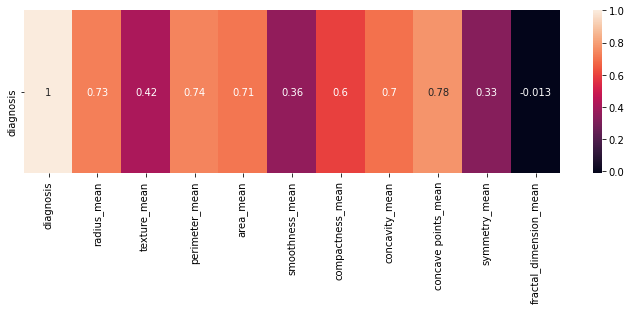

In [ ]:
corr = df[featurs_mean].corr()
plt.figure(figsize=(12,3))
sns.heatmap(corr.head(1),annot=True)     #annot = True 显示每个方格的数据
plt.show()

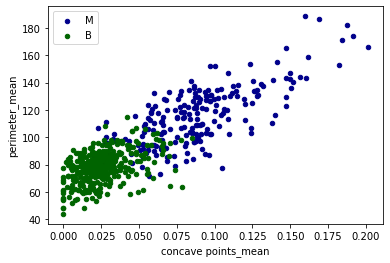

In [ ]:
ax = df[df['diagnosis']==1].plot.scatter(x='concave points_mean', y='perimeter_mean', color='DarkBlue', label='M');
df[df['diagnosis']==0].plot.scatter(x='concave points_mean', y='perimeter_mean', color='DarkGreen', label='B', ax=ax);

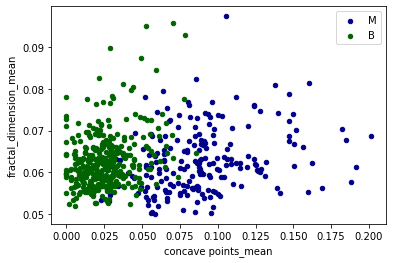

In [ ]:
ax = df[df['diagnosis']==1].plot.scatter(x='concave points_mean', y='fractal_dimension_mean', color='DarkBlue', label='M');
df[df['diagnosis']==0].plot.scatter(x='concave points_mean', y='fractal_dimension_mean', color='DarkGreen', label='B', ax=ax);

In [ ]:
result = sm.ols(formula="diagnosis ~ radius_mean + perimeter_mean + area_mean + concavity_mean + concave_points_mean", data=df).fit()
print(result.params)

Intercept             -1.317446
radius_mean            0.426151
perimeter_mean        -0.044743
area_mean             -0.001016
concavity_mean         1.054332
concave_points_mean    7.283534
dtype: float64


In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     207.1
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          4.78e-125
Time:                        12:48:48   Log-Likelihood:                -96.949
No. Observations:                 569   AIC:                             205.9
Df Residuals:                     563   BIC:                             232.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.3174    